In [1]:
### Python imports ###
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt

In [2]:
### Local imports ###
import sys
sys.path.append('../') # define relative path for local imports
from src.models.scm import SCM
from src.models.scm_from_article import NAFNet_Combine


In [3]:
# Load image from /var/hub/VITON-HD/train/image/03308_00.jpg
from PIL import Image
from refiners.fluxion.utils import image_to_tensor
def load_image(image_path: str) -> Image.Image:
        try:
            image = Image.open(image_path).convert("RGB")
            image = image_to_tensor(image).squeeze(0)
            return image
        except Exception as e:
            print(f"Error loading image '{file}': {e}")
            return None

path_gt = '/var/hub/VITON-HD/test/image/00006_00.jpg'
path_result = '/var/hub/VITON-HD-results-ladi-vton/paired/upper_body/00006_00.jpg'
path_clothed = '/var/hub/VITON-HD/test/cloth/00006_00.jpg'
image_gt = load_image(path_gt)
image_result = load_image(path_result)
image_cloth = load_image(path_clothed)

transform = transforms.Compose([
    transforms.Resize((512, 384))  # Resize to 512x384
])

# resized_gt = transform(image_gt)
resized_cloth = transform(image_cloth)
# resized_cloth = image_cloth

print(resized_cloth.shape,  image_result.shape)
concat_image = torch.cat((resized_cloth, image_result),0)
        



torch.Size([3, 512, 384]) torch.Size([3, 512, 384])


/home/laure/vton/.venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [4]:
batch = torch.unsqueeze(concat_image, 0)

In [5]:
img_channel = 6
width = 32

enc_blks = [2, 2, 4, 8]
middle_blk_num = 12
dec_blks = [2, 2, 2, 2]

# net = SCM(img_channel=img_channel, width=width, middle_blk_num=middle_blk_num,
#                     enc_blk_nums=enc_blks, dec_blk_nums=dec_blks)
net = NAFNet_Combine(img_channel=img_channel, width=width, middle_blk_num=middle_blk_num,
                    enc_blk_nums=enc_blks, dec_blk_nums=dec_blks)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 512, 384])
torch.Size([3, 512, 384])
torch.Size([512, 384, 3])


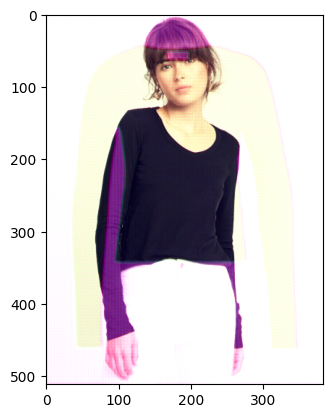

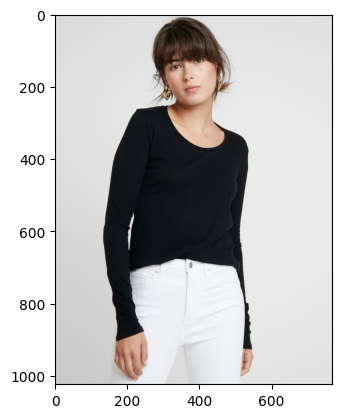

In [6]:
with torch.no_grad():
    out = net(batch)
    print(out.shape)

out = out.squeeze(0) # remove batch dimension
print(out.shape)
out = out.permute(1, 2, 0) # rearrange dimensions from (height, width, channels) to (channels, height, width)
print(out.shape)

plt.imshow(out)
plt.show()

plt.imshow(image_gt.squeeze(0).permute(1, 2, 0))
plt.show()
    